# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [495]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

---
## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [496]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df['hour'] = df.timestamp.dt.hour
df['dayofweek'] = df.timestamp.dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


---
### OnehotEncoder

In [497]:
hot_encoder = OneHotEncoder()
hot_encoded = hot_encoder.fit_transform(df.loc[:, ['uid', 'labname']]).toarray()

df_encoded = pd.DataFrame(hot_encoded, columns=hot_encoder.get_feature_names_out())

new_df = pd.concat([df_encoded, df.drop(columns=['uid', 'labname'])], axis=1)
new_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,20,3
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,20,3
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,20,3
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,20,3


---
### StandardScaler

In [498]:
scaler = StandardScaler()

new_df.loc[:,['numTrials', 'hour']] = scaler.fit_transform(new_df.loc[:, ['numTrials', 'hour']])
new_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382,3
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382,3
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382,3
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382,3


In [522]:
new_df.to_csv('../data/dayofweek.csv', index=False)

### Accuracy of the naive algorithm

In [500]:
X = new_df.loc[:, new_df.columns != 'dayofweek']
y = new_df['dayofweek'].values

clf_dummy = DummyClassifier(strategy='most_frequent').fit(X, y)
clf_dummy.score(X, y)

0.23487544483985764

Accuracy of the naive approach:
> ***0.23487544483985764***

---
## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [501]:
clf_logreg = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)
clf_logreg.score(X, y)

0.6405693950177936

Accuracy of logreg:
> ***0.6405693950177936***

In [502]:
def draw_barh_plot(coefs, features_names, top_n: int = 5):
    vals = dict(sorted(zip(features_names, coefs), key=lambda x: x[1])[-top_n:])
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.barh(list(vals.keys()), list(vals.values()), color='c')

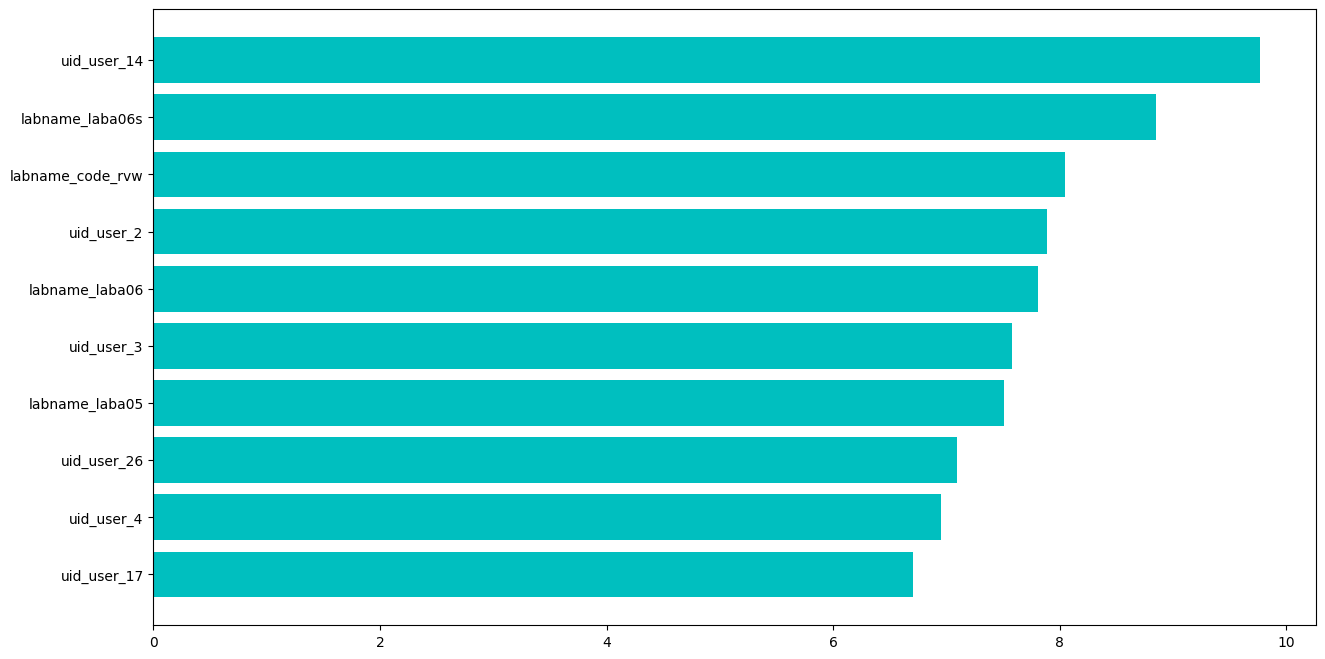

In [503]:
draw_barh_plot(sum(abs(clf_logreg.coef_)), clf_logreg.feature_names_in_, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [504]:
clf_svc = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21)).fit(X, y)
clf_svc.score(X, y)

0.6120996441281139

Accuracy of `SVC` model with `linear` kernel:
> 0.702846975088968\
> 0.6120996441281139

In [505]:
clf_svc_poly = SVC(kernel='poly', probability=True, random_state=21, decision_function_shape='ovr').fit(X, y)
clf_svc_poly.score(X, y)

0.8594306049822064

Accuracy of `SVC` model with `poly` kernel:
> 0.8594306049822064

In [506]:
clf_svc_rbf = SVC(kernel='rbf', probability=True, random_state=21, decision_function_shape='ovr').fit(X, y)
clf_svc_rbf.score(X, y)

0.8558718861209964

Accuracy of `SVC` model with `rbf` kernel:
> 0.8558718861209964

In [507]:
clf_svc_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=21, decision_function_shape='ovr').fit(X, y)
clf_svc_sigmoid.score(X, y)

0.3997627520759193

Accuracy of `SVC` model with `sigmoid` kernel:
> 0.3997627520759193

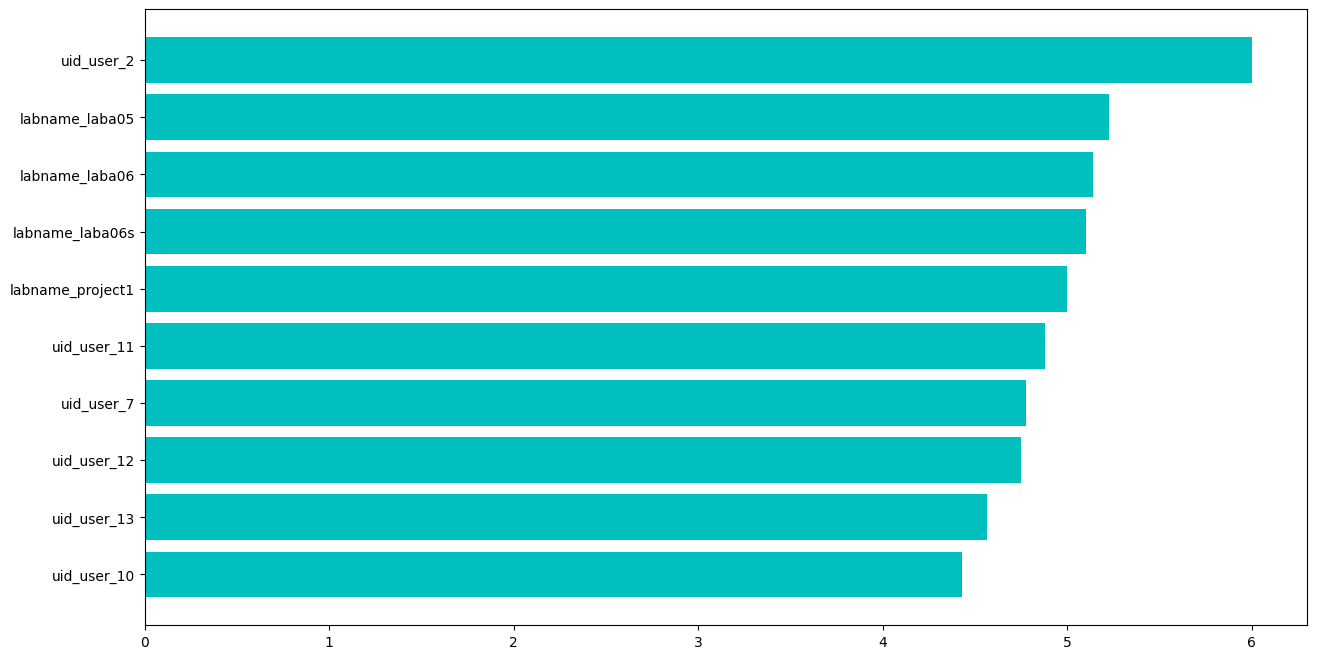

In [508]:
draw_barh_plot(sum(abs(estim.coef_) for estim in clf_svc.estimators_)[0], new_df.drop(columns='dayofweek').columns, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [509]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21).fit(X, y)
tree.score(X, y)

0.5516014234875445

In [510]:
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=21).fit(X, y)
tree_3.score(X, y)

0.48991696322657174

In [511]:
tree_5 = DecisionTreeClassifier(max_depth=5, random_state=21).fit(X, y)
tree_5.score(X, y)

0.6109134045077106

In [512]:
tree_6 = DecisionTreeClassifier(max_depth=6, random_state=21).fit(X, y)
tree_6.score(X, y)

0.6637010676156584

In [513]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.09837711,
       0.        , 0.06455791, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07642063, 0.        , 0.        ,
       0.        , 0.        , 0.01610628, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06154768, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05479407, 0.        , 0.08646791, 0.        , 0.05629871,
       0.27456793, 0.14931603, 0.06154574])

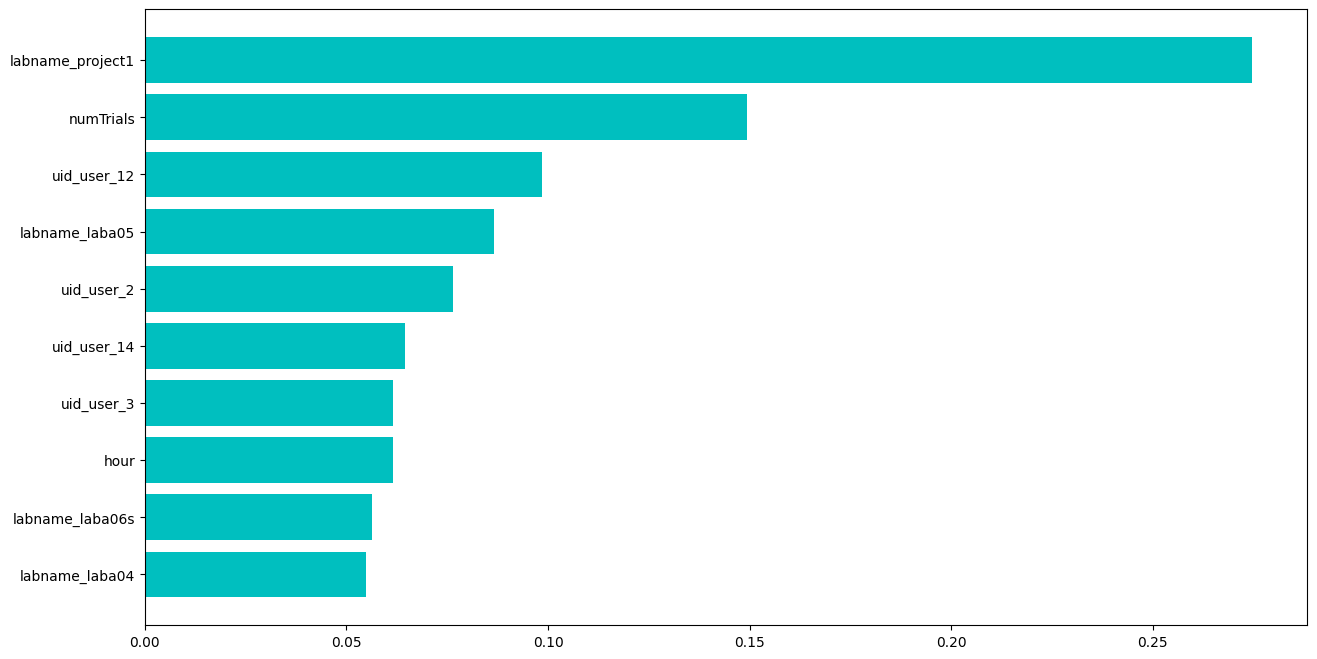

In [514]:
draw_barh_plot(abs(tree.feature_importances_), tree.feature_names_in_, 10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [515]:
forest = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21).fit(X, y)
forest.score(X, y)

0.9988137603795967

In [516]:
forest_50_25 = RandomForestClassifier(n_estimators=50, max_depth=25, random_state=21).fit(X, y)
forest_50_25.score(X, y)

0.9994068801897983

In [517]:
forest_150_25 = RandomForestClassifier(n_estimators=150, max_depth=25, random_state=21).fit(X, y)
forest_150_25.score(X, y)

0.9994068801897983

In [518]:
forest_100_15 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=21).fit(X, y)
forest_100_15.score(X, y)

0.9804270462633452

In [519]:
forest_100_35 = RandomForestClassifier(n_estimators=100, max_depth=35, random_state=21).fit(X, y)
forest_100_35.score(X, y)

1.0

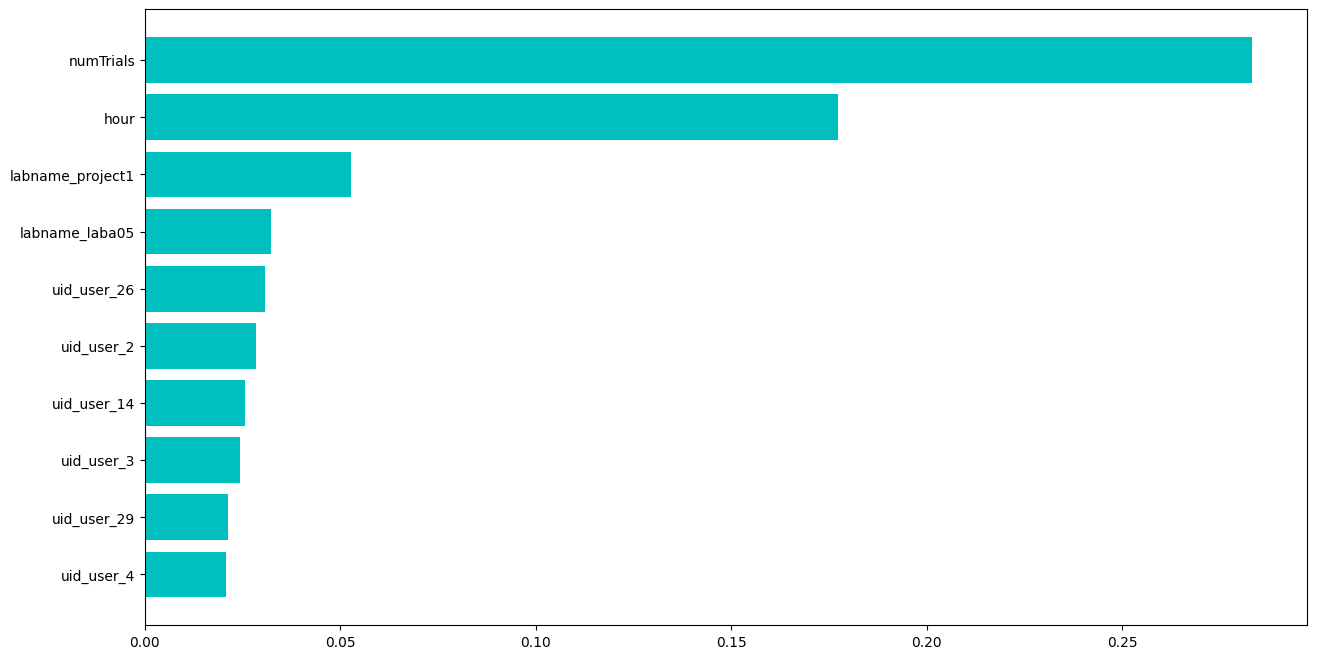

In [523]:
draw_barh_plot(abs(forest.feature_importances_), forest.feature_names_in_, 10)